<a href="https://colab.research.google.com/github/ashxjain/ERA-V2/blob/main/Session-11/S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pull common library
%cd
!git clone https://github.com/ashxjain/ERA-V2.git
%cd ERA-V2
!git pull origin main
%cd common

/root
Cloning into 'ERA-V2'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 179 (delta 85), reused 125 (delta 40), pack-reused 0
Receiving objects: 100% (179/179), 1.74 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/root/ERA-V2
From https://github.com/ashxjain/ERA-V2
 * branch            main       -> FETCH_HEAD
Already up to date.
/root/ERA-V2/common


In [ ]:
# Install dependencies
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Us

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torchsummary import summary

from main import *
from models import *
from utils import *

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data
train_loader, test_loader, classes = load_transformed_dataset(DatasetName.CIFAR10, 128)

100%|██████████| 170498071/170498071 [00:02<00:00, 72685176.53it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Model
model = ResNet18()
model = model.to(device)

# Displaying model summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
# Training and testing the model
train_acc, train_losses, test_acc, test_losses = train_test_model(model, device, train_loader, test_loader, num_epochs=20, lr=0.1, run_scheduler=True)

Epoch 1


  0%|          | 0/391 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train: Loss=1.7767 Batch_id=390 Accuracy=23.88: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]


Test set: Average loss: 0.0141, Accuracy: 3468/10000 (34.68%)

Epoch 2


Train: Loss=1.7034 Batch_id=390 Accuracy=34.83: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]


Test set: Average loss: 0.0120, Accuracy: 4392/10000 (43.92%)

Epoch 3


Train: Loss=1.6020 Batch_id=390 Accuracy=41.49: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]


Test set: Average loss: 0.0113, Accuracy: 4864/10000 (48.64%)

Epoch 4


Train: Loss=1.5445 Batch_id=390 Accuracy=46.38: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]


Test set: Average loss: 0.0106, Accuracy: 5258/10000 (52.58%)

Epoch 5


Train: Loss=1.3623 Batch_id=390 Accuracy=51.02: 100%|██████████| 391/391 [00:44<00:00,  8.77it/s]


Test set: Average loss: 0.0090, Accuracy: 5869/10000 (58.69%)

Epoch 6


Train: Loss=0.9429 Batch_id=390 Accuracy=54.59: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]


Test set: Average loss: 0.0077, Accuracy: 6562/10000 (65.62%)

Epoch 7


Train: Loss=1.2552 Batch_id=390 Accuracy=57.59: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]


Test set: Average loss: 0.0097, Accuracy: 6135/10000 (61.35%)

Epoch 8


Train: Loss=1.1072 Batch_id=390 Accuracy=59.66: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.0149, Accuracy: 5169/10000 (51.69%)

Epoch 9


Train: Loss=0.9471 Batch_id=390 Accuracy=61.53: 100%|██████████| 391/391 [00:44<00:00,  8.77it/s]


Test set: Average loss: 0.0082, Accuracy: 6645/10000 (66.45%)

Epoch 10


Train: Loss=1.0655 Batch_id=390 Accuracy=63.42: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]


Test set: Average loss: 0.0087, Accuracy: 6514/10000 (65.14%)

Epoch 11


Train: Loss=1.0181 Batch_id=390 Accuracy=64.81: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]


Test set: Average loss: 0.0083, Accuracy: 6499/10000 (64.99%)

Epoch 12


Train: Loss=1.0113 Batch_id=390 Accuracy=65.70: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]


Test set: Average loss: 0.0081, Accuracy: 6894/10000 (68.94%)

Epoch 13


Train: Loss=1.1893 Batch_id=390 Accuracy=66.52: 100%|██████████| 391/391 [00:44<00:00,  8.77it/s]


Test set: Average loss: 0.0053, Accuracy: 7756/10000 (77.56%)

Epoch 14


Train: Loss=1.0654 Batch_id=390 Accuracy=67.65: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]


Test set: Average loss: 0.0053, Accuracy: 7817/10000 (78.17%)

Epoch 15


Train: Loss=0.8020 Batch_id=390 Accuracy=67.96: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.0053, Accuracy: 7812/10000 (78.12%)

Epoch 16


Train: Loss=0.8683 Batch_id=390 Accuracy=68.69: 100%|██████████| 391/391 [00:43<00:00,  8.89it/s]


Test set: Average loss: 0.0056, Accuracy: 7703/10000 (77.03%)

Epoch 17


Train: Loss=0.8749 Batch_id=390 Accuracy=68.93: 100%|██████████| 391/391 [00:44<00:00,  8.83it/s]


Test set: Average loss: 0.0060, Accuracy: 7464/10000 (74.64%)

Epoch 18


Train: Loss=0.9101 Batch_id=390 Accuracy=69.64: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]


Test set: Average loss: 0.0053, Accuracy: 7760/10000 (77.60%)

Epoch 19


Train: Loss=0.8755 Batch_id=390 Accuracy=69.94: 100%|██████████| 391/391 [00:44<00:00,  8.84it/s]


Test set: Average loss: 0.0051, Accuracy: 7779/10000 (77.79%)

Epoch 20


Train: Loss=0.7188 Batch_id=390 Accuracy=70.68: 100%|██████████| 391/391 [00:44<00:00,  8.83it/s]


Test set: Average loss: 0.0057, Accuracy: 7648/10000 (76.48%)



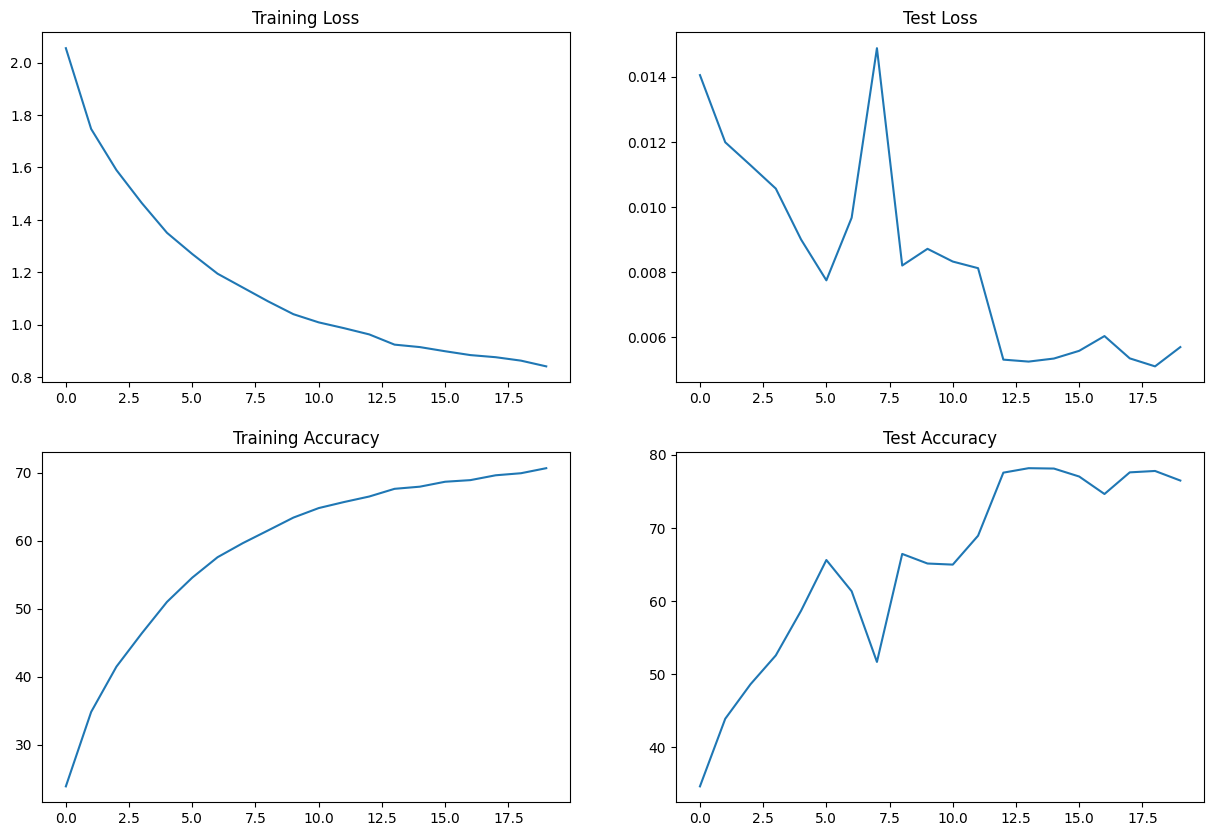

In [ ]:
# Plotting training metrics
plot_train_metrics(train_losses, train_acc, test_losses, test_acc)

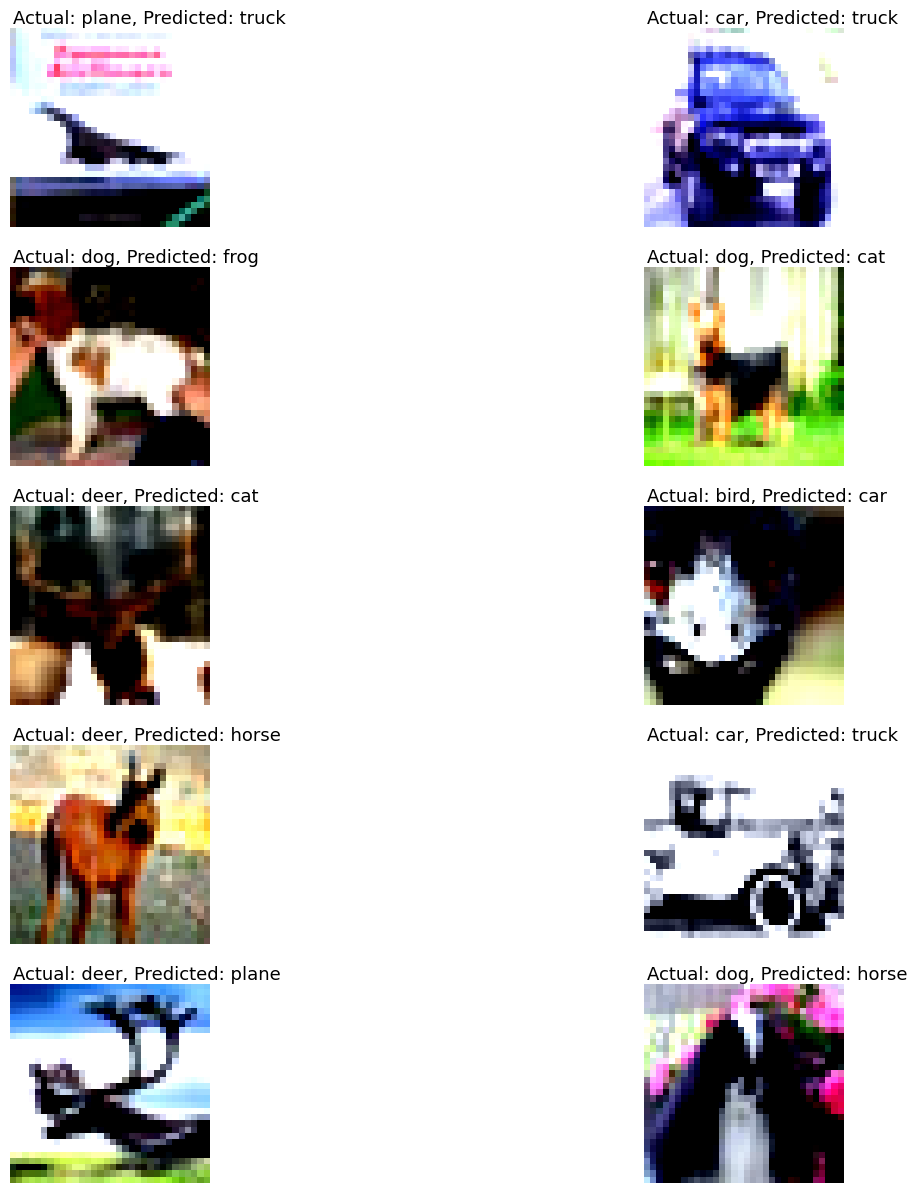

In [ ]:
# Show 10 misclassified images
show_misclassified_images_from_model(model, device, test_loader, classes, image_count=10)

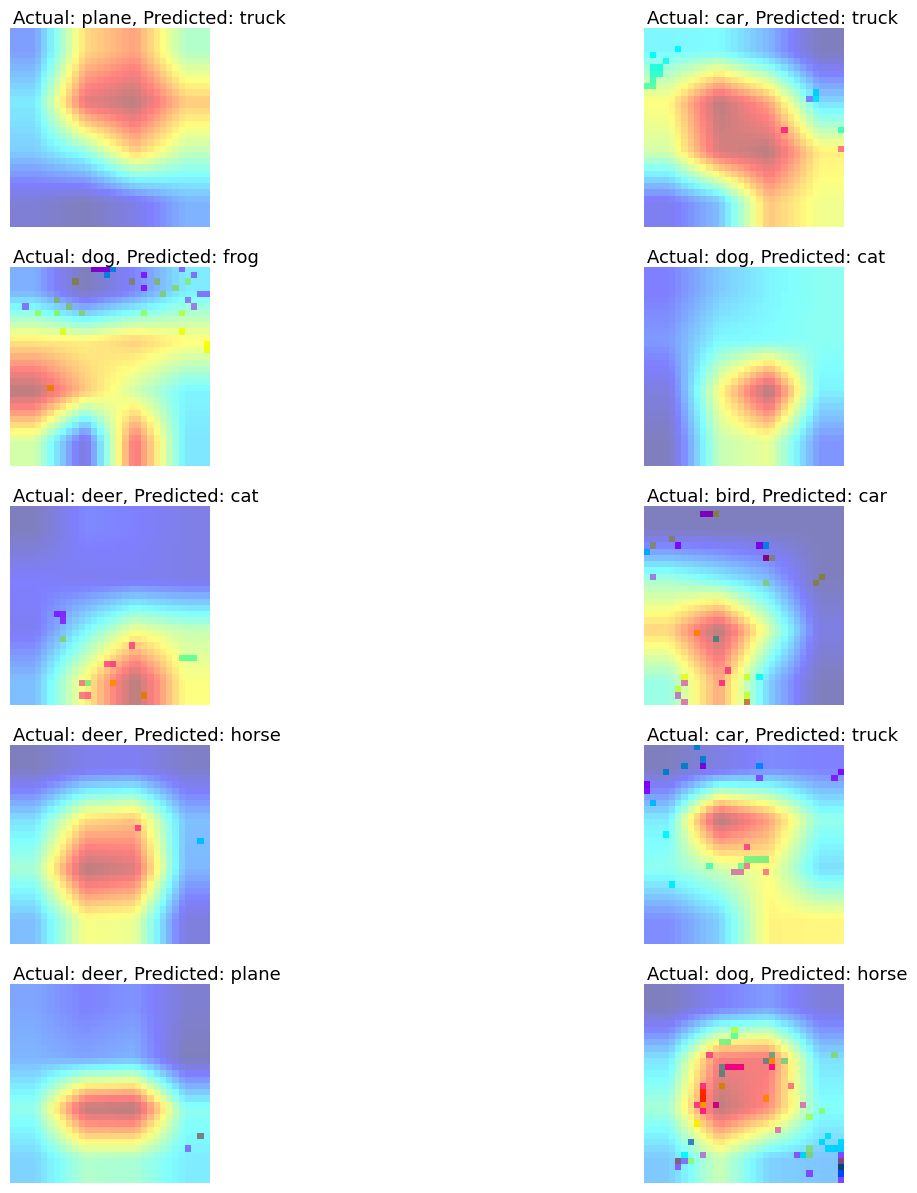

In [ ]:
# Show gradcam on 10 misclassified images
show_gradcam_on_misclassified_images_from_model(model, device, model.layer4[-1], test_loader, classes, image_count=10)

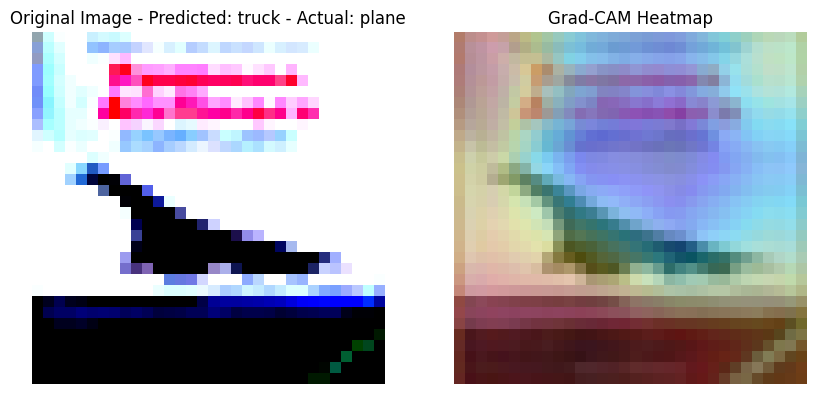

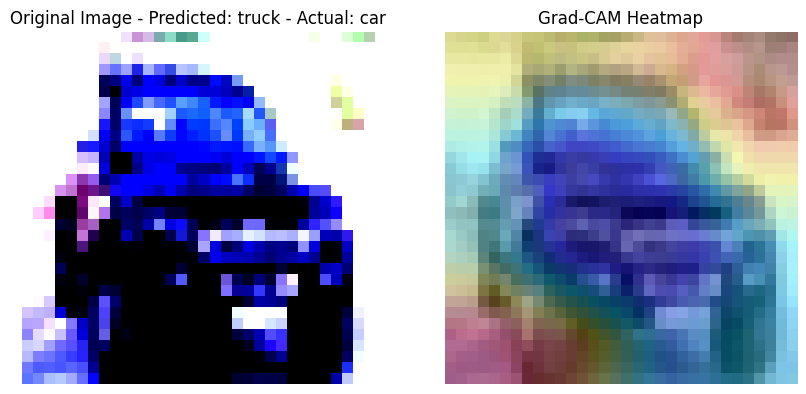

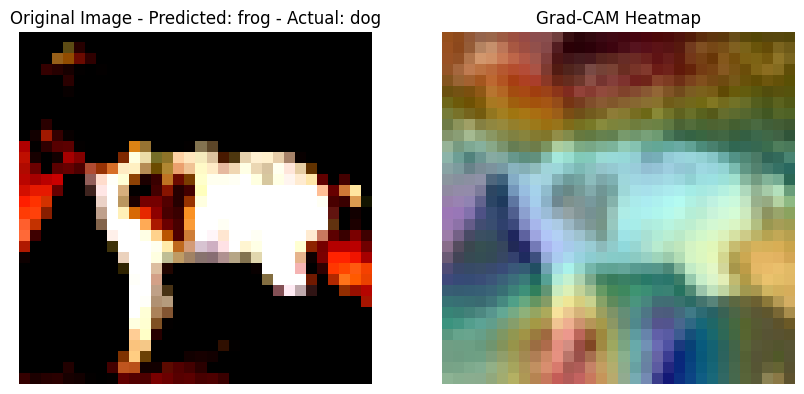

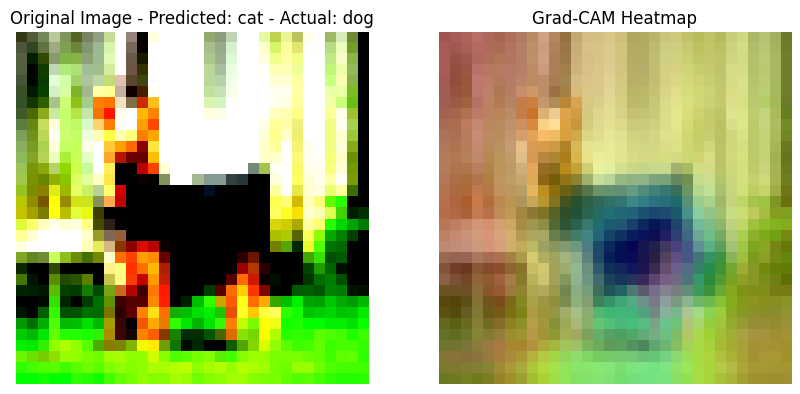

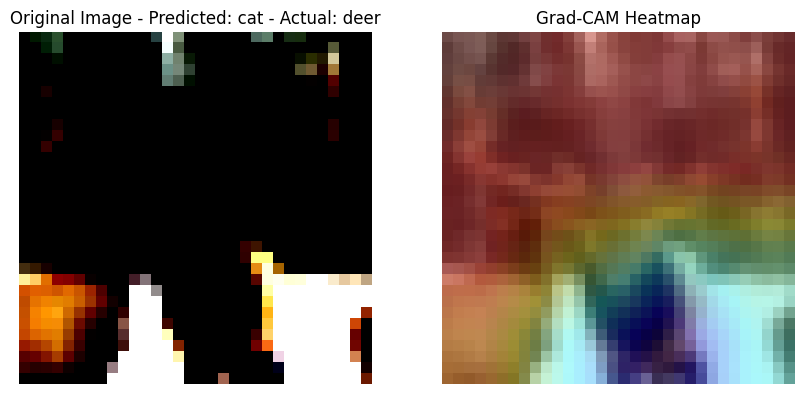

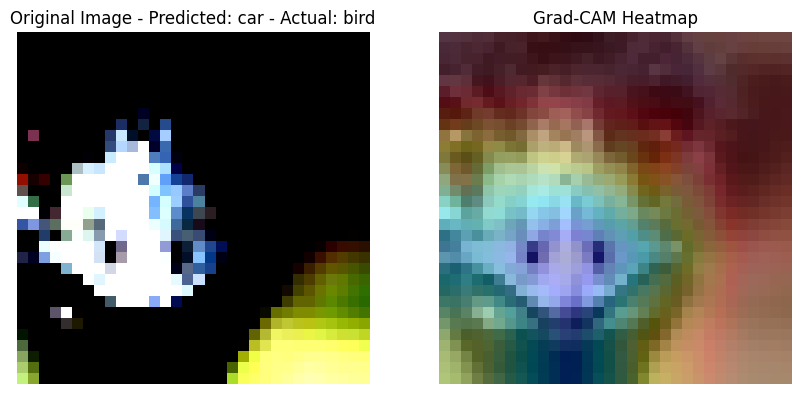

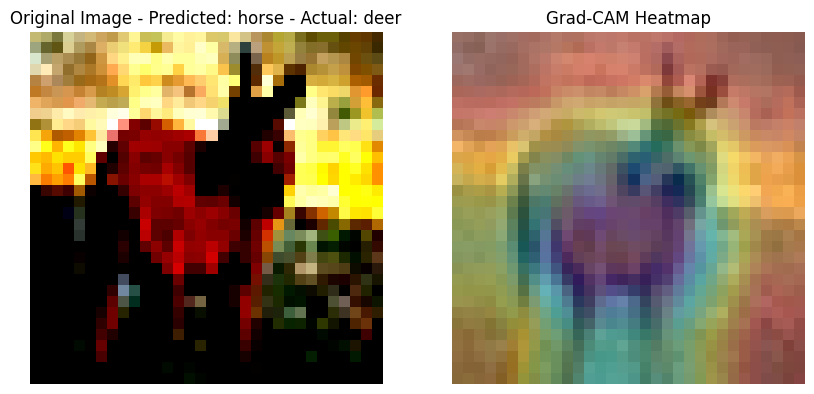

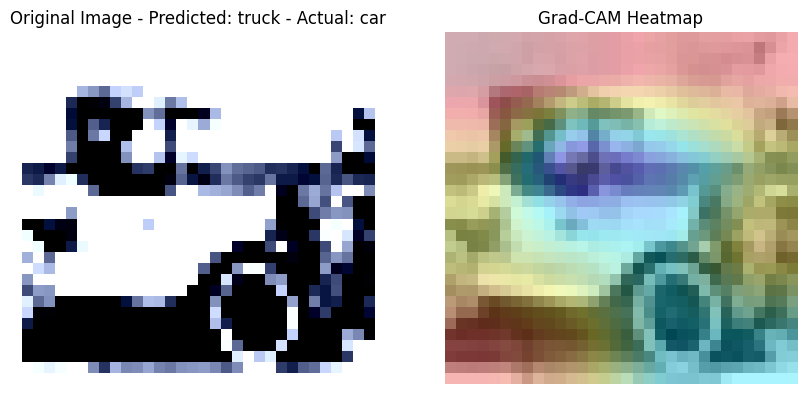

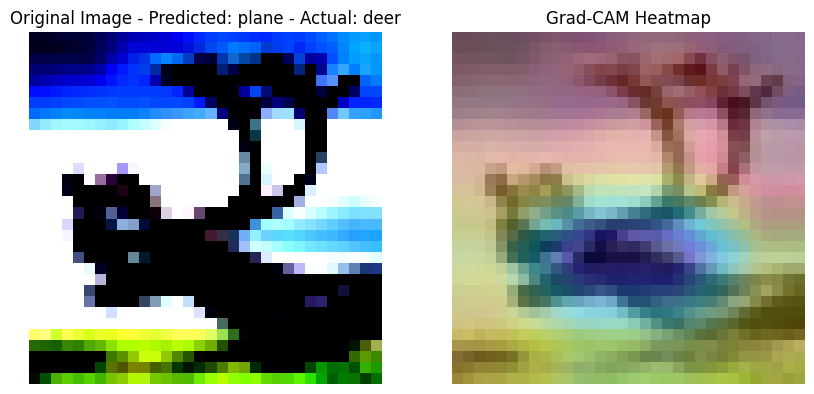

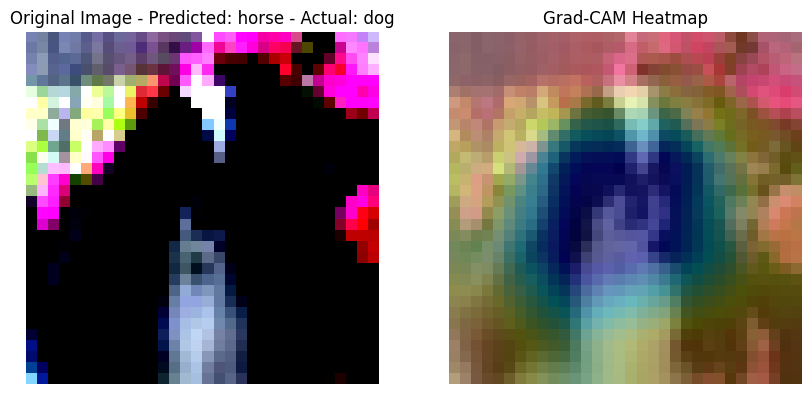

In [ ]:
# More detailed gradCAM on misclassified images.
run_gradcam_on_misclassified(model, device, model.layer4[-1], test_loader, classes, image_count=10)
